# Задание 3. Построение модели авторегрессии

In [1]:
import os
os.chdir("C:/Users/HP/Documents/analysis/TS/data/")

### Импорт библиотек

In [2]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima_model import ARMA

In [5]:
data = pd.read_csv('task3.csv',parse_dates = True, index_col = 0,delimiter=';',decimal=',')

In [6]:
data.head()

,Рыночные цены на материал 3 (руб.)
Дата,
2007-01-01,10.07
2007-02-01,10.04
2007-03-01,10.05
2007-04-01,10.05
2007-05-01,10.03


### Переименование столбцов

In [7]:
data_columns, data.columns = data.columns, ('y', )
data_index, data.index.name = data.index.name, 'date'
data.index = pd.DatetimeIndex(data.index.values, freq='MS')

### Визуализация данных

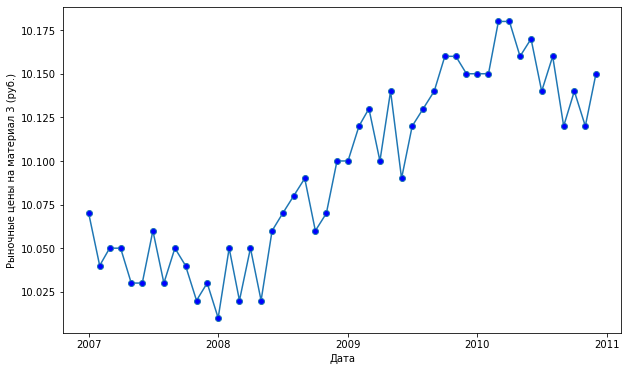

In [8]:
fig, ax = plt.subplots(figsize = (10, 6))

plt.xlabel(data_index)
plt.ylabel(data_columns[0])

ax.xaxis.set_major_locator(mpl.dates.YearLocator())
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%Y'))

ax.plot(data['y'], marker = 'o', markerfacecolor = 'blue')
    
plt.show()

### График автокорреляции

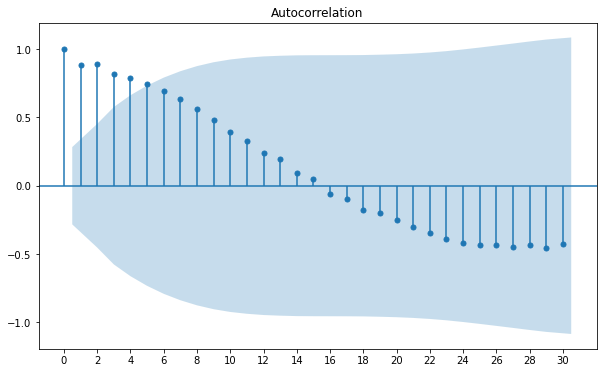

In [9]:
fig, ax = plt.subplots(figsize = (10, 6))

plot_acf(data['y'].dropna(), lags = 30, ax = ax)
plt.xticks(np.arange(0, 31, 2))
plt.show()

### График частной автокорреляции

C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


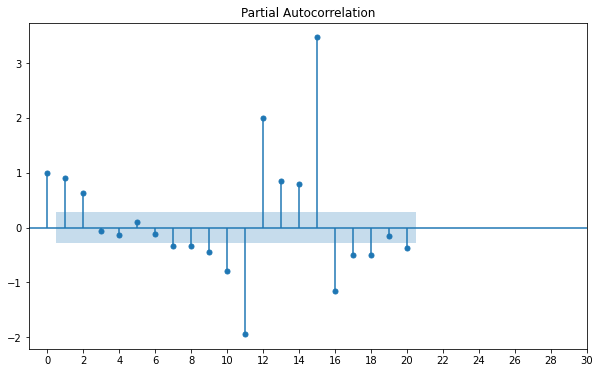

In [13]:
fig, ax = plt.subplots(figsize = (10, 6))

plot_pacf(data['y'].dropna(), lags = 20, ax = ax)
plt.xticks(np.arange(0, 31, 2))
plt.show()

### Построение модели авторегрессии

In [14]:
best_aic = AutoReg(data['y'], 1).fit().aic
best_order = 1
for i in range(1, 13):
    a = AutoReg(data['y'], i).fit().aic
    if a < best_aic:
        best_aic = a
        best_order = i
        
print(best_aic, best_order)

-7.823186797046115 2


C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,
C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,
C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,
C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names

In [19]:
model = AutoReg(data['y'], best_order).fit()
model.params

C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:252: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  FutureWarning,


intercept    0.425493
y.L1         0.378720
y.L2         0.579426
dtype: float64

In [20]:
data['y^'] = model.fittedvalues

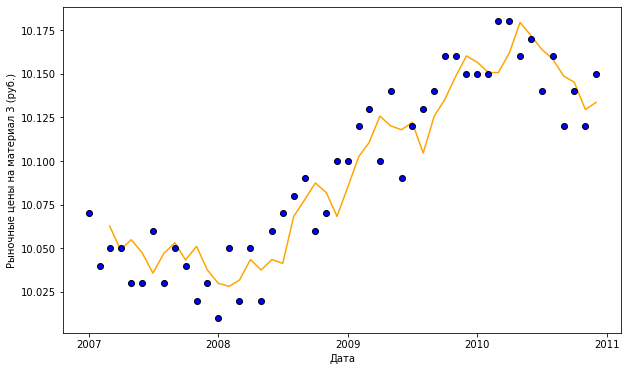

In [21]:
fig, ax = plt.subplots(figsize = (10, 6))

plt.xlabel(data_index)
plt.ylabel(data_columns[0])

ax.xaxis.set_major_locator(mpl.dates.YearLocator())
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%Y'))

ax.plot(data['y^'], color = 'orange')

ax.plot(data['y'], marker = 'o', color = (0, 0, 0, 0), markerfacecolor = 'blue')
    
plt.show()

### Строим точечный и интервальный прогноз

In [24]:
datafv = pd.DataFrame(model.predict(48, 59))
datafv.columns = ('y',)
datafv.head()

,y
2011-01-01,10.133291
2011-02-01,10.144346
2011-03-01,10.138850
2011-04-01,10.143175
2011-05-01,10.141628


In [26]:
variance = np.sum(np.power(data['y'] - data['y^'], 2)) / (n-1)
sigma =np.power(variance,0.5)
sigma

0.018544899878370446

In [27]:
from scipy.stats import t
tstud=t.interval(0.95, len(data)-1)
list(tstud)

[-2.0117405104757546, 2.0117405104757546]

In [28]:
lower=list(tstud)[0]*sigma
lower

-0.03730752634803472

In [29]:
upper=list(tstud)[1]*sigma
upper

0.03730752634803472

In [30]:
datafv['y-'] = datafv['y'] + lower
datafv['y+'] = datafv['y'] + upper

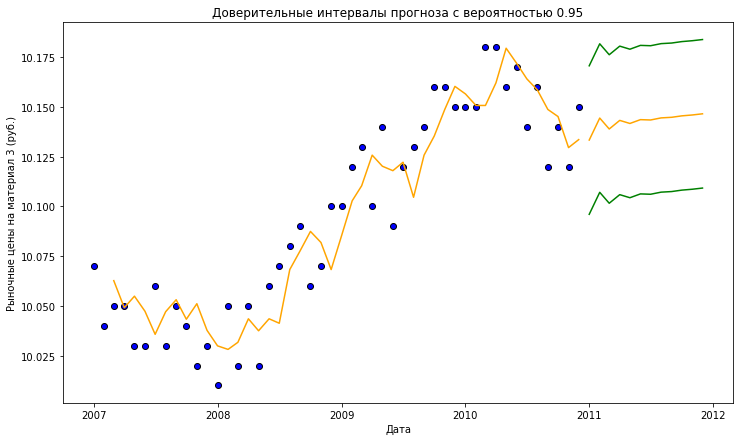

In [31]:
fig, ax = plt.subplots(figsize = (12, 7))

plt.title('Доверительные интервалы прогноза с вероятностью 0.95')
plt.xlabel(data_index)
plt.ylabel(data_columns[0])

ax.plot(datafv['y-'], color = 'green')
ax.plot(datafv['y'],  color = 'orange')
ax.plot(datafv['y+'], color = 'green')

ax.plot(data['y'], marker = 'o', color = (0, 0, 0, 0), markerfacecolor = 'blue')
ax.plot(data['y^'], color = 'orange')

ax.xaxis.set_major_locator(mpl.dates.YearLocator())
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%Y'))
    
plt.show()

#### Коэффициент детерминации:

In [32]:
1 - np.sum(np.power(data['y'] - data['y^'], 2)) / np.sum(np.power(data['y'] - np.mean(data['y']), 2))

0.8763807573658107